# ***Data Loading from Kaggle, https://www.kaggle.com/nphantawee/pump-sensor-data#***

## Process of download and unzip

In [ ]:
# import library to update kaggle.json for kaggle api
from google.colab import files

# install dependancy for kaggle
!pip install -q kaggle
!mkdir ~/.kaggle
!cd ~/.kaggle

# uploading of json file
uploaded = files.upload()

# download and unzip
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d nphantawee/pump-sensor-data
!unzip -q /content/pump-sensor-data.zip

Saving kaggle.json to kaggle.json
 67% 25.0M/37.1M [00:00<00:00, 30.8MB/s]
100% 37.1M/37.1M [00:00<00:00, 50.8MB/s]


## ***Checking of GPU details***

In [ ]:
!nvidia-smi

Fri Mar 12 03:08:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# ***Dataset***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Understanding of data

In [ ]:
df = pd.read_csv('/content/sensor.csv')
df.shape

(220320, 55)

In [ ]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [ ]:
df.isna().sum()

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


## Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,220320.0,110159.500000,63601.049991,0.000000,55079.750000,110159.500000,165239.250000,220319.000000
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960


## Preprocessing

### Remove column unamed column

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True) 

### As missing sensor might indicate sensor faulty, imputation might not be appropriate, pad with -1 indicates missing sensor after inspected the sensor value will not be negative

In [ ]:
df.fillna(-1, inplace=True)

### Checking of number of classes in machine status

In [ ]:
classes = df['machine_status'].unique().tolist()
classes

['NORMAL', 'BROKEN', 'RECOVERING']

Extremely Imbalance Data between BROKEN, NORMAL and RECOVERING

In [ ]:
df.groupby('machine_status')['sensor_00'].count()

machine_status
BROKEN             7
NORMAL        205836
RECOVERING     14477
Name: sensor_00, dtype: int64

### Making mapping for the *machine_status*

In [ ]:
mapping_dict = {classes[0]:0, classes[1]:2, classes[2]:1}
df['machine_status'] = df['machine_status'].apply(lambda x: mapping_dict[x])

In [ ]:
mapping_dict

{'BROKEN': 2, 'NORMAL': 0, 'RECOVERING': 1}

In [ ]:
num_classes = len(df['machine_status'].unique().tolist())
num_classes

3

### Sensor signal plot

In [ ]:
for col in df.iloc[:,1:-1]:
  print(col)
  plt.figure(figsize=(20,5))
  plt.plot(df.index,df[col])
  plt.plot(df.index,df.machine_status)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Normalization for sensors column

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df.iloc[:,1:-1])
df.iloc[:,1:-1] = scaler.transform(df.iloc[:,1:-1])

In [ ]:
df.head(2)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,0.976438,0.833088,0.950534,0.961201,0.793227,0.766929,0.619817,0.696492,0.653563,0.617443,0.495772,0.795479,0.698199,0.083304,0.83947,0.0,0.624885,0.777585,0.607038,0.757343,0.88904,0.794749,0.840069,0.795189,0.628046,0.88358,0.698582,0.214911,0.426781,0.467493,0.37192,0.379685,0.370306,0.275199,0.405433,0.493047,0.199039,0.519177,0.098791,0.059227,0.139312,0.075928,0.087338,0.104804,0.040601,0.207533,0.139822,0.128705,0.282576,0.14763,0.243812,0.202187,0
1,2018-04-01 00:01:00,0.976438,0.833088,0.950534,0.961201,0.793227,0.766929,0.619817,0.696492,0.653563,0.617443,0.495772,0.795479,0.698199,0.083304,0.83947,0.0,0.624885,0.777585,0.607038,0.757343,0.88904,0.794749,0.840069,0.795189,0.628046,0.88358,0.698582,0.214911,0.426781,0.467493,0.37192,0.379685,0.370306,0.275199,0.405433,0.493047,0.199039,0.519177,0.098791,0.059227,0.139312,0.075928,0.087338,0.104804,0.040601,0.207533,0.139822,0.128705,0.282576,0.14763,0.243812,0.202187,0


# ***Multilayer Feedforward NN Model 1***

## Modelling 1

### Train Test split

In [ ]:
series = df.iloc[:,1:-1].values
labels = df.iloc[:,-1].values

series[0], labels[0]

(array([0.97643798, 0.83308767, 0.95053407, 0.96120051, 0.79322722,
        0.76692913, 0.61981682, 0.69649188, 0.65356251, 0.61744346,
        0.49577171, 0.79547902, 0.69819913, 0.08330404, 0.83947046,
        0.        , 0.62488479, 0.77758477, 0.60703767, 0.75734259,
        0.88904018, 0.79474915, 0.84006936, 0.79518926, 0.62804595,
        0.88357981, 0.69858222, 0.21491139, 0.42678132, 0.46749348,
        0.37192036, 0.3796849 , 0.37030623, 0.27519859, 0.40543332,
        0.493047  , 0.199039  , 0.51917702, 0.09879092, 0.05922652,
        0.13931185, 0.07592839, 0.08733793, 0.10480405, 0.0406006 ,
        0.20753276, 0.13982248, 0.12870465, 0.28257564, 0.1476298 ,
        0.24381179, 0.20218671]), 0)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(series,labels,test_size=0.3,stratify=labels)

### Training data

In [ ]:
input_shape = x_train.shape[1]
input_shape

52

In [ ]:
x_train.shape

(154224, 52)

In [ ]:
x_train[0]

array([0.99057513, 0.8556435 , 0.8896532 , 0.87919279, 0.7935161 ,
       0.80229165, 0.61888353, 0.69649188, 0.63415738, 0.60742731,
       0.62480394, 0.62166525, 0.52927739, 0.03285429, 0.84102315,
       0.        , 0.63100272, 0.79303502, 0.62996314, 0.76058312,
       0.89280628, 0.79804046, 0.85286418, 0.8001689 , 0.599702  ,
       0.90120715, 0.7437443 , 0.22799945, 0.54086744, 0.00241692,
       0.39245147, 0.44041505, 0.43541252, 0.31091903, 0.61456622,
       0.68431888, 0.59379549, 0.49155202, 0.12429097, 0.07013816,
       0.12461223, 0.09756217, 0.10399487, 0.11052619, 0.04175685,
       0.13909241, 0.14371819, 0.16196021, 0.23063317, 0.13581722,
       0.23716334, 0.23224925])

### Training labels

#### Checking on the proportion of classes in training and test

In [ ]:
print("{} - {} ({:.5f})".format(classes[0],np.where(y_train==0)[0].shape[0],np.where(y_train==0)[0].shape[0]/y_train.shape[0]))
print("{} - {} ({:.5f})".format(classes[2],np.where(y_train==2)[0].shape[0],np.where(y_train==1)[0].shape[0]/y_train.shape[0]))
print("{} - {} ({:.5f})".format(classes[1],np.where(y_train==2)[0].shape[0],np.where(y_train==2)[0].shape[0]/y_train.shape[0]))

NORMAL - 144085 (0.93426)
RECOVERING - 5 (0.06571)
BROKEN - 5 (0.00003)


In [ ]:
print("{} - {} ({:.5f})".format(classes[0],np.where(y_test==0)[0].shape[0],np.where(y_test==0)[0].shape[0]/y_test.shape[0]))
print("{} - {} ({:.5f})".format(classes[2],np.where(y_test==1)[0].shape[0],np.where(y_test==1)[0].shape[0]/y_test.shape[0]))
print("{} - {} ({:.5f})".format(classes[1],np.where(y_test==2)[0].shape[0],np.where(y_test==2)[0].shape[0]/y_test.shape[0]))

NORMAL - 61751 (0.93426)
RECOVERING - 4343 (0.06571)
BROKEN - 2 (0.00003)


#### one hot encoding

In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([1., 0., 0.], dtype=float32)

### Model Definition

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Inp=Input(shape=input_shape)
x = Dense(256, activation='sigmoid',name = 'Dense_01')(Inp)
x = Dense(128, activation='sigmoid',name = 'Dense_02')(x)
x = Dense(64, activation='sigmoid',name = 'Dense_03')(x)
x = Dense(32, activation='sigmoid',name = 'Dense_04')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='sigmoid',name = 'Dense_05')(x)

In [ ]:
model = Model(Inp,output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 52)]              0         
_________________________________________________________________
Dense_01 (Dense)             (None, 256)               13568     
_________________________________________________________________
Dense_02 (Dense)             (None, 128)               32896     
_________________________________________________________________
Dense_03 (Dense)             (None, 64)                8256      
_________________________________________________________________
Dense_04 (Dense)             (None, 32)                2080      
_________________________________________________________________
Dropout_02 (Dropout)         (None, 32)                0         
_________________________________________________________________
Dense_05 (Dense)             (None, 3)                 99    

### Model Training

Running at 100 Epoches, it converge fair quick at the beginning, with 20 epochs, set to 50 for contiuous running for inspecting the best number of epoch

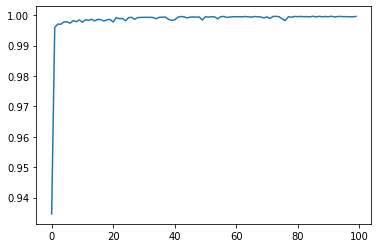

In [ ]:
batch_size = 128
epochs = 50
learning_rate = 0.001

In [ ]:
opt = tf.keras.optimizers.Adam(lr = learning_rate)

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= opt,
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Epoch 1/50
964/964 [==============================] - 5s 3ms/step - loss: 0.2465 - accuracy: 0.8942 - val_loss: 0.0353 - val_accuracy: 0.9942
Epoch 2/50
964/964 [==============================] - 2s 2ms/step - loss: 0.0307 - accuracy: 0.9922 - val_loss: 0.0107 - val_accuracy: 0.9956
Epoch 3/50
964/964 [==============================] - 2s 2ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.0072 - val_accuracy: 0.9962
Epoch 4/50
964/964 [==============================] - 2s 2ms/step - loss: 0.0084 - accuracy: 0.9968 - val_loss: 0.0046 - val_accuracy: 0.9980
Epoch 5/50
964/964 [==============================] - 2s 2ms/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 0.0043 - val_accuracy: 0.9978
Epoch 6/50
964/964 [==============================] - 2s 2ms/step - loss: 0.0055 - accuracy: 0.9976 - val_loss: 0.0042 - val_accuracy: 0.9981
Epoch 7/50
964/964 [==============================] - 2s 2ms/step - loss: 0.0052 - accuracy: 0.9977 - val_loss: 0.0040 - val_accuracy: 0.9982
Epoch 

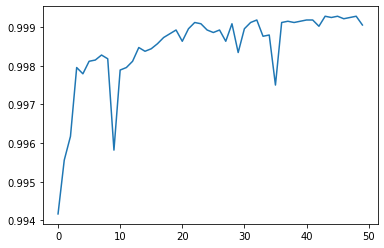

In [ ]:
plt.plot(hist.history['val_accuracy'])

## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

y_truth = np.argmax(y_test,axis=1).reshape(-1,1)
y_hat = np.argmax(model.predict(x_test),axis=1).reshape(-1,1)

cm = confusion_matrix(y_truth, y_hat)
print(mapping_dict)
print(cm)

{'NORMAL': 0, 'BROKEN': 2, 'RECOVERING': 1}
[[61717    34     0]
 [   25  4318     0]
 [    2     0     0]]


In [ ]:
from sklearn.metrics import classification_report

print(mapping_dict)
print(classification_report(y_truth, y_hat))

{'NORMAL': 0, 'BROKEN': 2, 'RECOVERING': 1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61751
           1       0.99      0.99      0.99      4343
           2       0.00      0.00      0.00         2

    accuracy                           1.00     66096
   macro avg       0.66      0.66      0.66     66096
weighted avg       1.00      1.00      1.00     66096



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Conclusion**: MLFF not able to identify the broken due to overly imbalance

# ***Multilayer Feedforward NN Model 2***

## Modelling 2

### Dimension reduction PCA 

In [ ]:
series = df.iloc[:,1:-1].values
labels = df.iloc[:,-1].values

series[0], labels[0]

(array([0.97643798, 0.83308767, 0.95053407, 0.96120051, 0.79322722,
        0.76692913, 0.61981682, 0.69649188, 0.65356251, 0.61744346,
        0.49577171, 0.79547902, 0.69819913, 0.08330404, 0.83947046,
        0.        , 0.62488479, 0.77758477, 0.60703767, 0.75734259,
        0.88904018, 0.79474915, 0.84006936, 0.79518926, 0.62804595,
        0.88357981, 0.69858222, 0.21491139, 0.42678132, 0.46749348,
        0.37192036, 0.3796849 , 0.37030623, 0.27519859, 0.40543332,
        0.493047  , 0.199039  , 0.51917702, 0.09879092, 0.05922652,
        0.13931185, 0.07592839, 0.08733793, 0.10480405, 0.0406006 ,
        0.20753276, 0.13982248, 0.12870465, 0.28257564, 0.1476298 ,
        0.24381179, 0.20218671]), 0)

In [ ]:
series.shape

(220320, 52)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(series)
series_ = pca.transform(series)

In [ ]:
series_.shape

(220320, 13)

### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(series_,labels,test_size=0.3,stratify=labels)

### Training data

In [ ]:
input_shape = x_train.shape[1]
input_shape

13

In [ ]:
x_train.shape

(154224, 13)

In [ ]:
x_train[0]

array([-0.08343523, -0.06291133, -0.44580343,  0.25325113, -0.13677379,
        0.04329357, -0.04153676, -0.09770296,  0.05049785, -0.01847059,
        0.00348481,  0.03192808, -0.01427883])

### Training labels

#### Checking on the proportion of classes in training and test

In [ ]:
print("{} - {} ({:.5f})".format(classes[0],np.where(y_train==0)[0].shape[0],np.where(y_train==0)[0].shape[0]/y_train.shape[0]))
print("{} - {} ({:.5f})".format(classes[2],np.where(y_train==1)[0].shape[0],np.where(y_train==1)[0].shape[0]/y_train.shape[0]))
print("{} - {} ({:.5f})".format(classes[1],np.where(y_train==2)[0].shape[0],np.where(y_train==2)[0].shape[0]/y_train.shape[0]))

NORMAL - 144085 (0.93426)
RECOVERING - 10134 (0.06571)
BROKEN - 5 (0.00003)


In [ ]:
mapping_dict

{'BROKEN': 2, 'NORMAL': 0, 'RECOVERING': 1}

In [ ]:
print("{} - {} ({:.5f})".format(classes[0],np.where(y_test==0)[0].shape[0],np.where(y_test==0)[0].shape[0]/y_test.shape[0]))
print("{} - {} ({:.5f})".format(classes[2],np.where(y_test==1)[0].shape[0],np.where(y_test==1)[0].shape[0]/y_test.shape[0]))
print("{} - {} ({:.5f})".format(classes[1],np.where(y_test==2)[0].shape[0],np.where(y_test==2)[0].shape[0]/y_test.shape[0]))

NORMAL - 61751 (0.93426)
RECOVERING - 4343 (0.06571)
BROKEN - 2 (0.00003)


#### one hot encoding

In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([1., 0., 0.], dtype=float32)

### Model Definition

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Inp=Input(shape=input_shape)
x = Dense(256, activation='sigmoid',name = 'Dense_01')(Inp)
x = Dense(128, activation='sigmoid',name = 'Dense_02')(x)
x = Dense(64, activation='sigmoid',name = 'Dense_03')(x)
x = Dense(32, activation='sigmoid',name = 'Dense_04')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='sigmoid',name = 'Dense_05')(x)

In [ ]:
model = Model(Inp,output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
Dense_01 (Dense)             (None, 256)               3584      
_________________________________________________________________
Dense_02 (Dense)             (None, 128)               32896     
_________________________________________________________________
Dense_03 (Dense)             (None, 64)                8256      
_________________________________________________________________
Dense_04 (Dense)             (None, 32)                2080      
_________________________________________________________________
Dropout_02 (Dropout)         (None, 32)                0         
_________________________________________________________________
Dense_05 (Dense)             (None, 3)                 99  

### Model Training

In [ ]:
batch_size = 128
epochs = 250 # X epoch is sufficient for 99% accuracy
learning_rate = 0.001

In [ ]:
opt = tf.keras.optimizers.Adam(lr = learning_rate)

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= opt,
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Epoch 1/250
964/964 [==============================] - 3s 3ms/step - loss: 0.2887 - accuracy: 0.8623 - val_loss: 0.1549 - val_accuracy: 0.9344
Epoch 2/250
964/964 [==============================] - 2s 2ms/step - loss: 0.0856 - accuracy: 0.9638 - val_loss: 0.0126 - val_accuracy: 0.9954
Epoch 3/250
964/964 [==============================] - 2s 2ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0084 - val_accuracy: 0.9964
Epoch 4/250
964/964 [==============================] - 2s 2ms/step - loss: 0.0113 - accuracy: 0.9959 - val_loss: 0.0070 - val_accuracy: 0.9964
Epoch 5/250
964/964 [==============================] - 2s 2ms/step - loss: 0.0092 - accuracy: 0.9960 - val_loss: 0.0065 - val_accuracy: 0.9965
Epoch 6/250
964/964 [==============================] - 2s 2ms/step - loss: 0.0088 - accuracy: 0.9958 - val_loss: 0.0065 - val_accuracy: 0.9966
Epoch 7/250
964/964 [==============================] - 2s 2ms/step - loss: 0.0078 - accuracy: 0.9962 - val_loss: 0.0067 - val_accuracy: 0.9965

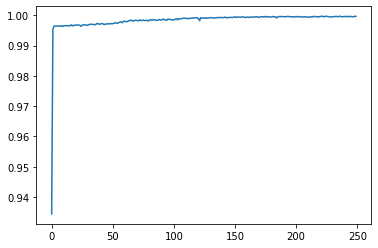

In [ ]:
plt.plot(hist.history['val_accuracy'])

## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

y_truth = np.argmax(y_test,axis=1).reshape(-1,1)
y_hat = np.argmax(model.predict(x_test),axis=1).reshape(-1,1)

cm = confusion_matrix(y_truth, y_hat)
print(mapping_dict)
print(cm)

{'NORMAL': 0, 'BROKEN': 2, 'RECOVERING': 1}
[[61726    25     0]
 [   17  4326     0]
 [    0     2     0]]


In [ ]:
from sklearn.metrics import classification_report

print(mapping_dict)
print(classification_report(y_truth, y_hat))

{'NORMAL': 0, 'BROKEN': 2, 'RECOVERING': 1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61751
           1       0.99      1.00      0.99      4343
           2       0.00      0.00      0.00         2

    accuracy                           1.00     66096
   macro avg       0.66      0.67      0.66     66096
weighted avg       1.00      1.00      1.00     66096



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion: MLFF with PCA, the prediction minimally improved, smaller dimension has increased the training time for the model to converge, no improvement on detecting the failures

# ***Convolutional NN Model***


## Modelling 3

### Data Generation

### Train Test split

In [ ]:
window_size = 52

Assuming hidden representation among each data point in 2D array manner, unable to split randomly

In [ ]:
series = df.iloc[:,1:-1].values
labels = df.iloc[:,-1].values

In [ ]:
limit = series.shape[0] - window_size + 1

limit

220269

In [ ]:
series_ = np.vstack([series[s:(s+52),:].reshape((1,52,52,1)) for s in range(0,limit)] )
labels_ = np.vstack([np.max(labels[s:(s+52)]) for s in range(0,limit)])

In [ ]:
series_.shape, labels_.shape

((220269, 52, 52, 1), (220269, 1))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(series_,labels_,test_size=0.3)

Delete variable to free up ram space

In [ ]:
del series_
del labels_

### Training Data

In [ ]:
input_shape = x_train[0].shape
input_shape

(52, 52, 1)

In [ ]:
x_train.shape

(154188, 52, 52, 1)

In [ ]:
x_train[0]

array([[[0.98503106],
        [0.78872817],
        [0.91552749],
        ...,
        [0.09975779],
        [0.        ],
        [0.17183506]],

       [[0.98974364],
        [0.78872817],
        [0.91628863],
        ...,
        [0.09975779],
        [0.        ],
        [0.17038981]],

       [[0.98447682],
        [0.78872817],
        [0.91628863],
        ...,
        [0.09975779],
        [0.        ],
        [0.17038981]],

       ...,

       [[0.98863488],
        [0.78947998],
        [0.91857169],
        ...,
        [0.11032693],
        [0.        ],
        [0.22993676]],

       [[0.98613982],
        [0.79098377],
        [0.91704959],
        ...,
        [0.11032692],
        [0.        ],
        [0.22964765]],

       [[0.98918912],
        [0.79173558],
        [0.91704959],
        ...,
        [0.11094864],
        [0.        ],
        [0.23051489]]])

### Training labels

#### Checking on the proportion of classes in training and test

In [ ]:
print("{} - {} ({:.5f})".format(classes[0],np.where(y_train==0)[0].shape[0],np.where(y_train==0)[0].shape[0]/y_train.shape[0]))
print("{} - {} ({:.5f})".format(classes[2],np.where(y_train==1)[0].shape[0],np.where(y_train==1)[0].shape[0]/y_train.shape[0]))
print("{} - {} ({:.5f})".format(classes[1],np.where(y_train==2)[0].shape[0],np.where(y_train==2)[0].shape[0]/y_train.shape[0]))

NORMAL - 143844 (0.93291)
RECOVERING - 10087 (0.06542)
BROKEN - 257 (0.00167)


In [ ]:
print("{} - {} ({:.5f})".format(classes[0],np.where(y_test==0)[0].shape[0],np.where(y_test==0)[0].shape[0]/y_test.shape[0]))
print("{} - {} ({:.5f})".format(classes[2],np.where(y_test==1)[0].shape[0],np.where(y_test==1)[0].shape[0]/y_test.shape[0]))
print("{} - {} ({:.5f})".format(classes[1],np.where(y_test==2)[0].shape[0],np.where(y_test==2)[0].shape[0]/y_test.shape[0]))

NORMAL - 61584 (0.93195)
RECOVERING - 4390 (0.06643)
BROKEN - 107 (0.00162)


#### one hot encoding

In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([1., 0., 0.], dtype=float32)

In [ ]:
y_train[0]

array([1., 0., 0.], dtype=float32)

### Model Definition

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Dropout
from tensorflow.keras.layers import ReLU, Add, MaxPooling2D,Flatten, GlobalAvgPool2D, Concatenate

Inp = Input(shape=input_shape)
x = Conv2D(8, (12, 12), strides=2, padding='valid',activation='relu',name = 'Conv_01')(Inp)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(64, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_01')(x)
output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

In [ ]:
model = Model(Inp,output)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 52, 52, 1)]       0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 21, 21, 8)         1160      
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 10, 10, 8)         0         
_________________________________________________________________
Flatten_01 (Flatten)         (None, 800)               0         
_________________________________________________________________
Dense_01 (Dense)             (None, 64)                51264     
_________________________________________________________________
Dropout_01 (Dropout)         (None, 64)                0         
_________________________________________________________________
Dense_02 (Dense)             (None, 3)                 195 

### Model Training

In [ ]:
batch_size = 32
epochs = 100 # X epoch is sufficient for 99% accuracy
learning_rate = 0.001

In [ ]:
opt = tf.keras.optimizers.Adam(lr = learning_rate)

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= opt,
              metrics=['accuracy'])

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Epoch 1/100
3855/3855 [==============================] - 40s 3ms/step - loss: 0.0302 - accuracy: 0.9877 - val_loss: 0.0054 - val_accuracy: 0.9971
Epoch 2/100
3855/3855 [==============================] - 12s 3ms/step - loss: 0.0062 - accuracy: 0.9969 - val_loss: 0.0050 - val_accuracy: 0.9970
Epoch 3/100
3855/3855 [==============================] - 12s 3ms/step - loss: 0.0052 - accuracy: 0.9972 - val_loss: 0.0027 - val_accuracy: 0.9988
Epoch 4/100
3855/3855 [==============================] - 12s 3ms/step - loss: 0.0038 - accuracy: 0.9981 - val_loss: 0.0024 - val_accuracy: 0.9990
Epoch 5/100
3855/3855 [==============================] - 12s 3ms/step - loss: 0.0035 - accuracy: 0.9982 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 6/100
3855/3855 [==============================] - 12s 3ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.0016 - val_accuracy: 0.9993
Epoch 7/100
3855/3855 [==============================] - 12s 3ms/step - loss: 0.0031 - accuracy: 0.9984 - val_loss: 0.0017 -

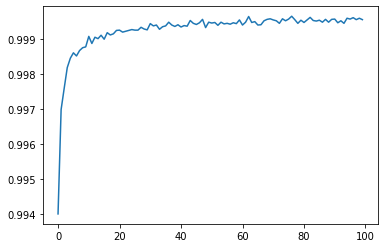

In [ ]:
plt.plot(hist.history['accuracy'])

## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

y_truth = np.argmax(y_test,axis=1).reshape(-1,1)
y_hat = np.argmax(model.predict(x_test),axis=1).reshape(-1,1)

cm = confusion_matrix(y_truth, y_hat)
print(mapping_dict)
print(cm)

{'NORMAL': 0, 'BROKEN': 2, 'RECOVERING': 1}
[[61582     0     2]
 [  113  4273     4]
 [    3     1   103]]


In [ ]:
from sklearn.metrics import classification_report

print(mapping_dict)
print(classification_report(y_truth, y_hat))

{'NORMAL': 0, 'BROKEN': 2, 'RECOVERING': 1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61584
           1       1.00      0.97      0.99      4390
           2       0.94      0.96      0.95       107

    accuracy                           1.00     66081
   macro avg       0.98      0.98      0.98     66081
weighted avg       1.00      1.00      1.00     66081



## Conclusion: By treating the sensor sequence as 2D-array, it actually increase the number of negative sample, included the hidden representation between sensors, hence it bring up the detection on negative cases with  convolutional layer to create features from the sensor data to relate it to each status of the pump
